In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from collections import Counter
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/bhavanbhatt/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bhavanbhatt/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/bhavanbhatt/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [2]:
data_meta = pd.read_json('Data/meta-North_Dakota.json',lines=True)
data_reviews = pd.read_json('Data/review-North_Dakota.json', lines=True)

In [3]:
data_meta.head()

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,St Peter & Paul Church,"St Peter & Paul Church, 500 Main St, Karlsruhe...",0x52d94fbefa0e6353:0xf709e2d8674fe3a,None,48.093248,-100.618664,[Catholic church],4.9,7,None,None,{'Accessibility': ['Wheelchair accessible entr...,None,"[0x52d9384b75abac93:0x13526f8266cae6cf, 0x52d9...",https://www.google.com/maps/place//data=!4m2!3...
1,Northwest Martial Arts Academy,"Northwest Martial Arts Academy, 1430 Main Ave,...",0x52c8cbe775edec7d:0xb46e15ed33643070,None,46.875093,-96.802717,[Martial arts school],5.0,8,None,"[[Thursday, 7:30AM–8PM], [Friday, 7:30AM–8PM],...",{'Accessibility': ['Wheelchair accessible entr...,Closed ⋅ Opens 7:30AM,"[0x52c8ccbcb1785327:0x2d50311eabd7afc, 0x52cf3...",https://www.google.com/maps/place//data=!4m2!3...
2,Thad's Amazing Magic - Fargo Birthday Party Magic,Thad's Amazing Magic - Fargo Birthday Party Ma...,0x52c8cd270f50bbbb:0x4ee4629598a8090e,None,46.812415,-96.856729,"[Magician, Children's party service]",5.0,58,None,"[[Thursday, Open 24 hours], [Friday, Open 24 h...",{'Amenities': ['Good for kids']},Open 24 hours,"[0x52c8c9613725e9ef:0xc628b86d8593e7e6, 0x52c8...",https://www.google.com/maps/place//data=!4m2!3...
3,Threefold,"Threefold, 212 W Main Ave, Bismarck, ND 58501",0x52d7836b7314da5d:0xc3cc63667b8c13a0,None,46.805707,-100.792990,"[Film production company, Video editing servic...",5.0,5,None,"[[Wednesday, 9AM–6PM], [Thursday, 9AM–6PM], [F...",None,Closed ⋅ Opens 9AM Thu,"[0x52d7836c2b519b77:0x74c84187e38f42b, 0x52d78...",https://www.google.com/maps/place//data=!4m2!3...
4,Gray Brothers Dairy,"Gray Brothers Dairy, 408 N Main St, Stanley, N...",0x5320bcc09c8e6f15:0xc888ebee3ea483b6,None,48.324312,-102.390000,None,5.0,1,None,None,None,None,"[0x5320bcc63e8fe69d:0x4f22ad0dd39b1970, 0x5320...",https://www.google.com/maps/place//data=!4m2!3...


In [4]:
data_reviews.head()

,user_id,name,time,rating,text,pics,resp,gmap_id
0,1.088493e+20,أحمد آل إبراهيم,1600517759614,5.0,I want to join Catholic Christ.,None,None,0x52d94fbefa0e6353:0xf709e2d8674fe3a
1,1.137480e+20,John OpenMinded,1594757122443,5.0,Its Catholic and devout. What more do you need?,None,None,0x52d94fbefa0e6353:0xf709e2d8674fe3a
2,1.089884e+20,Juergen Wolf,1574580027389,5.0,This was my Church in Karlsruhe. However in Ka...,None,None,0x52d94fbefa0e6353:0xf709e2d8674fe3a
3,1.094611e+20,Jamie Lee,1572608951549,4.0,Go with god,None,None,0x52d94fbefa0e6353:0xf709e2d8674fe3a
4,1.177488e+20,lucas03,1604339936721,5.0,(Translated by Google) everything faker not th...,None,None,0x52d94fbefa0e6353:0xf709e2d8674fe3a


In [5]:
print(data_reviews.shape)
print(data_reviews['user_id'].nunique())
print(data_reviews['user_id'].nunique()/data_reviews.shape[0]*100)

(1109558, 8)
293523
26.45404746755014


In [6]:
def preprocess_text(text):
    if pd.isna(text):
        return []
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

data_reviews['clean_text'] = data_reviews['text'].apply(preprocess_text)

In [7]:
data_reviews['clean_text']

0                             i want to join catholic christ
1              its catholic and devout what more do you need
2          this was my church in karlsruhe however in kar...
3                                                go with god
4          translated by google everything faker not the ...
                                 ...                        
1109553                                                   []
1109554                                                   []
1109555                                                   []
1109556                                                   []
1109557                                                   []
Name: clean_text, Length: 1109558, dtype: object

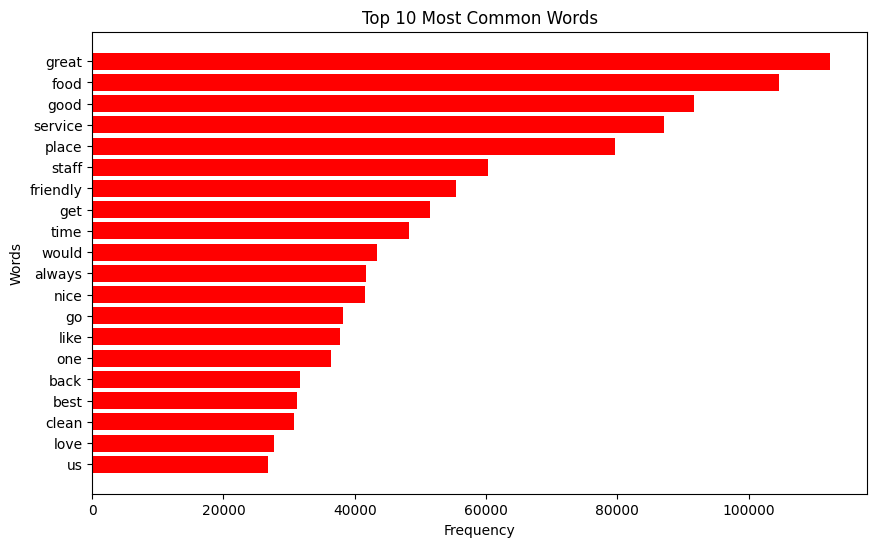

In [8]:
stop_words = set(stopwords.words('english'))
clean_descriptions = ''.join([str(i) for i in data_reviews['clean_text']])
clean_descriptions = clean_descriptions.lower().split()
clean_descriptions = [word for word in clean_descriptions if word not in stop_words]

word_freq = Counter(clean_descriptions)

common_words_df = pd.DataFrame(word_freq.most_common(20), columns=['Word', 'Frequency'])
plt.figure(figsize=(10, 6))
plt.barh(common_words_df['Word'], common_words_df['Frequency'], color='red')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 10 Most Common Words')
plt.gca().invert_yaxis()
plt.show()

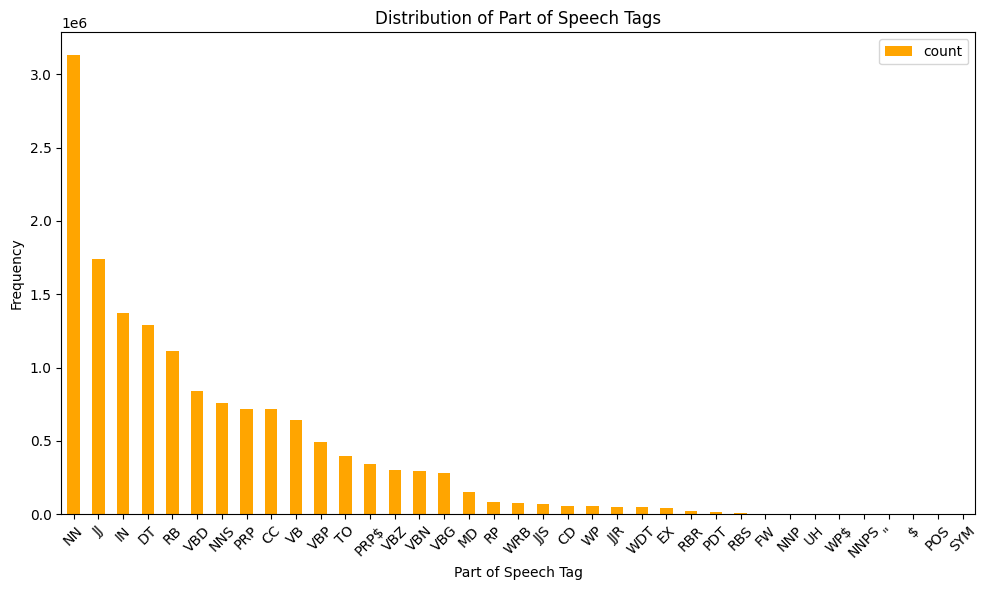

In [9]:
pos_tags = []
for description in data_reviews['clean_text']:
    description = re.sub(r'[^a-zA-Z\s]', '', str(description))
    tokens = word_tokenize(str(description))
    pos_tags.extend(pos_tag(tokens))

pos_counts = Counter(tag for word, tag in pos_tags)

plt.figure(figsize=(10, 6))
pos_df = pd.DataFrame.from_dict(pos_counts, orient='index', columns=['count'])
pos_df = pos_df.sort_values(by='count', ascending=False)
pos_df.plot(kind='bar', ax=plt.gca(), color='orange')
plt.title('Distribution of Part of Speech Tags')
plt.xlabel('Part of Speech Tag')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
text = ''.join([str(i) for i in data_reviews['clean_text']])
text = text.lower()

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      colormap='viridis', max_words=100,
                      contour_color='steelblue', contour_width=2).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# import pandas as pd

# # Sample DataFrame
# data = {
#     'text': ['text1', 'text2', 'text3', 'text4', 'text5'],
#     'gmap_id': [1, 2, 1, 2, 1]
# }

# data_reviews = pd.DataFrame(data)

# # Group by 'gmap_id' and aggregate 'text' into a list
# grouped_data = data_reviews.groupby('gmap_id')['text'].apply(list).reset_index()

# # Merge the grouped data back into the original dataframe
# data_reviews = pd.merge(data_reviews.drop(columns=['text']), grouped_data, on='gmap_id', how='left')

# # Rename the new column to 'text_list'
# data_reviews = data_reviews.rename(columns={'text': 'text_list'})

# # Drop duplicates based on 'gmap_id'
# data_reviews = data_reviews.drop_duplicates(subset='gmap_id')

# print(data_reviews)

